In [21]:
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set()

from skimage.io import imread
from sklearn.cluster import KMeans, MiniBatchKMeans

['images\\bunny.jpg', 'images\\dog.jpg', 'images\\elephant.jpg', 'images\\film.png', 'images\\fox.jpg', 'images\\lion.jpg', 'images\\meerkat.jpg', 'images\\orangutan.jpeg', 'images\\panda.jpg', 'images\\panda2.jpg', 'images\\panda3.jpg', 'images\\quokka.jpg', 'images\\tiger.jpg', 'images\\tiger2.jpg', 'images\\wolf.jpg', 'images\\wolf2.jpg', 'images\\zebra.jpg']
(328, 302, 3)


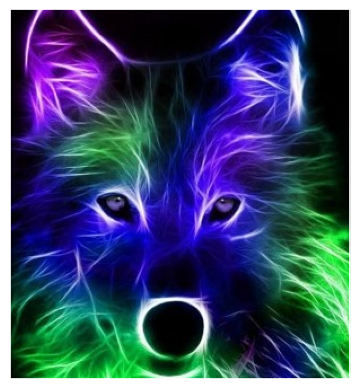

In [22]:
images_path = [os.path.join('images', image) for image in os.listdir('images')]
print(images_path)
images_objects = [imread(image) for image in images_path]

doggy = images_objects[14]
print(doggy.shape)
ax = plt.axes(xticks=[], yticks=[]); ax.imshow(doggy)

In [23]:
def flatten(image):
    return image.reshape(-1, image.shape[-1])

In [24]:
images_objects = [image/255.0 for image in images_objects]

print(len(images_objects))

doggy = images_objects[14]

17


In [25]:
def plot_pixels(image, title, colors=None, N=10000):
    flat_image = flatten(image)
    if colors is None:
        colors = flat_image
    
    rng = np.random.RandomState(0)
    i = rng.permutation(flat_image.shape[0])[:N]
    colors = colors[i]
    r, g, b = flat_image[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(r, g, c=colors, marker='.')
    ax[0].set(xlabel='red', ylabel='green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(r, b, c=colors, marker='.')
    ax[1].set(xlabel='red', ylabel='blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)


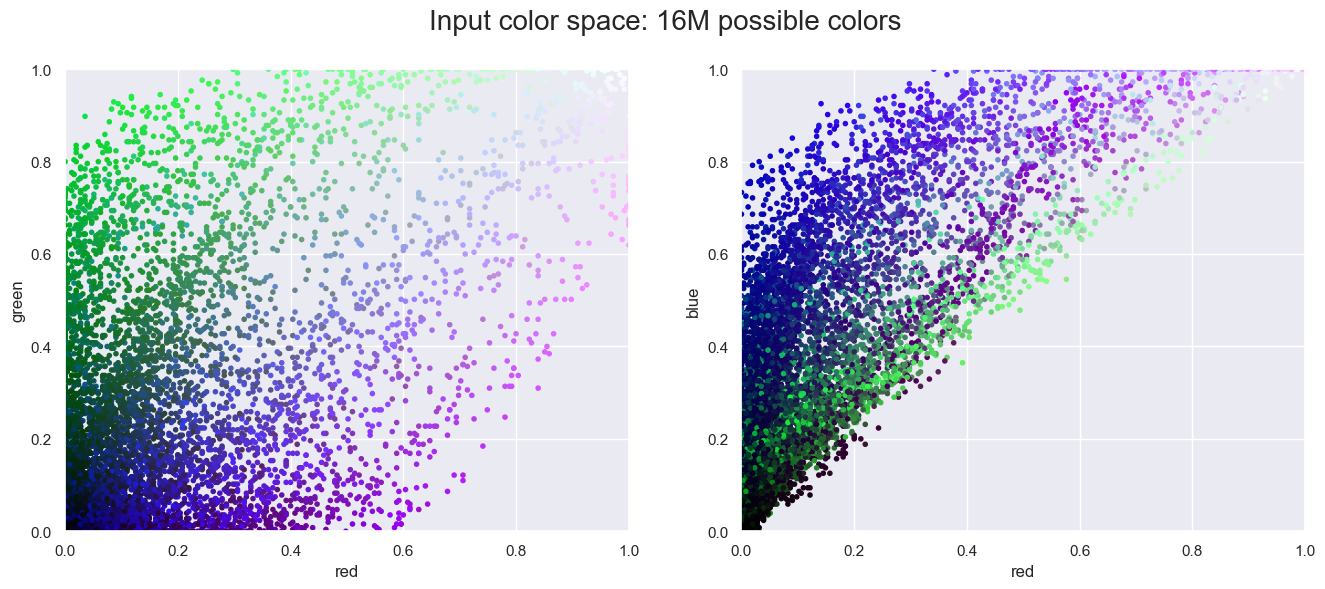

In [26]:
plot_pixels(doggy, title='Input color space: 16M possible colors')

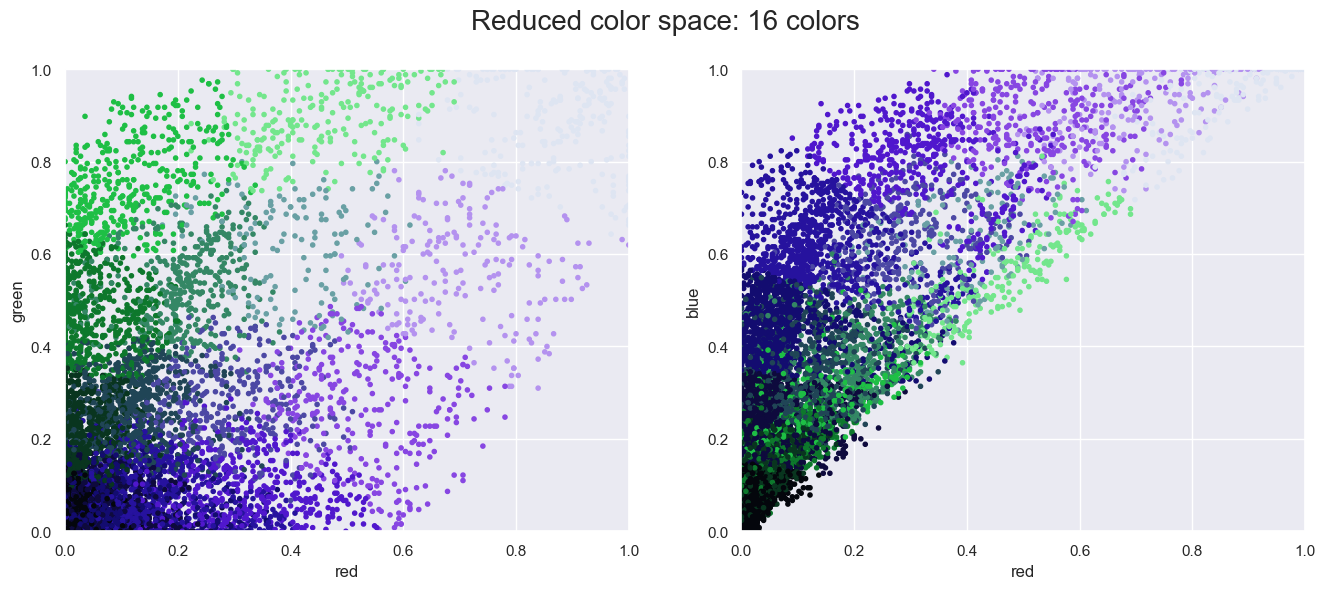

In [27]:
import warnings; warnings.filterwarnings('ignore')

kmeans = MiniBatchKMeans(16)
kmeans.fit(flatten(doggy))
new_colors = kmeans.cluster_centers_[kmeans.predict(flatten(doggy))]

plot_pixels(doggy, colors=new_colors, title='Reduced color space: 16 colors')

In [28]:
def compress_image(image, name, num_colors=16):
    flat_image = flatten(image)
    kmeans = MiniBatchKMeans(num_colors)
    kmeans.fit(flat_image)
    new_colors = kmeans.cluster_centers_[kmeans.predict(flat_image)]
    image_recolored = new_colors.reshape(image.shape)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(image); ax[0].set_title('Original image', size=16)
    ax[1].imshow(image_recolored); ax[1].set_title('Compressed image', size=16)

    plt.savefig(f'output/{name}.png', dpi=125)

In [29]:
for i in range(len(images_objects)):
    compress_image(images_objects[i], images_path[i][images_path[i].index('/')+1:images_path[i].index('.')])
print('Images compressed successfully')

ValueError: substring not found